<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/hon_gong_03-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3-1 k-최근접 이웃 회귀
===========================
> ### 농어의 길이, 높이, 두께를 측정한 데이터로 농어의 무게를 예측해보자
> * 회귀란 두 변수 사이의 상관관계를 분석하는 방법
> * k-최근접 이웃 회귀 알고리즘은 분류와 마찬가지로 예측하려는 샘플에 가장 가까운 수치들의 평균값을 구한다

In [15]:
# 훈련데이터로 농어의 길이와 무게를 활용
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

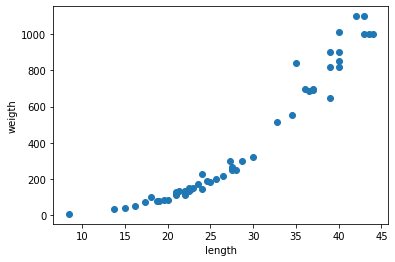

In [16]:
# 데이터의 형태 확인
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [17]:
# 훈련세트와 테스트세트로 나누어준다
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [18]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다
# 앞서 도미와 빙어를 구분할 때는 길이와 무게가 특성이었기 때문에 2차원 배열이었지만,
# 지금은 농어의 길이를 특성으로 하여 무게를 측정하기 때문에 
# 특성 1개의 1차원 배열을 수동으로 2차원 배열으로 만들어 준다: (42, ) -> (42, 1)

In [19]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [20]:
# k-최근접 이웃 회귀 알고리즘으로 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

> ### 회귀 모델의 평가기준은 결정계수(coefficient of determination). 이를 간단히 $R^{2}$ 라고도 부른다
> $$R^{2} = 1 -  \frac{\sum (샘플의 타깃 - 예측한 값)^{2}}{\sum (샘플의 타깃 - 타깃의 평균)^{2}}$$
> * 예측이 타깃에 아주 가까워지면 1에 가까운 값이 된다


In [21]:
print(knr.score(test_input, test_target))

0.992809406101064


> * 다른 성능지표를 활용하여 모델의 성능을 가늠해본다
> * Mean Absolute Error(MAE)는 타깃 값과 예측값의 차이를 절대값으로 변환하여 평균화 한다

In [23]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측 만들어 줌
test_prediction = knr.predict(test_input)
# MAE 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


> * 예측이 평균적으로 19g 정도 타깃값과 다른것을 확인
> * 지금까지는 훈련세트로 모델을 훈련하고 테스트 세트로 모델을 평가
> * **훈련세트를 사용해 모델을 평가해본다면 어떤 결과가 나올까?**
> * 앞에서 훈련한 모델을 사용해 훈련 세트의 $R^{2}$ 점수 확인 

In [24]:
print(knr.score(train_input, train_target))

0.9698823289099254


> * 훈련 세트보다 테스트 세트의 점수가 높은 **과소적합**이 발생
> * k-최근접 이웃 알고리즘의 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지므로 모델이 더 복잡해진다. 따라서 훈련세트에 더 잘 맞게 된다. 

In [25]:
# 이웃의 개수를 기본값 5에서 3으로 낮추어준다
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [26]:
print(knr.score(test_input, test_target))

0.9746459963987609
